In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Intro
Traumatic Brain Injury (TBI) is a form of brain injury caused by trauma to the brain from an external force. At least 5.3 million Americans live with a TBI-related disability. The data that I will be exploring is TBI data for the military from the years 2006 to 2014. First, I will read in the data and see what it looks like.

In [2]:
df.mili = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-24/tbi_military.csv')


── Column specification ────────────────────────────────────────────────────────
cols(
  service = col_character(),
  component = col_character(),
  severity = col_character(),
  diagnosed = col_double(),
  year = col_double()
)




In [3]:
df.mili %>% head

service,component,severity,diagnosed,year
<chr>,<chr>,<chr>,<dbl>,<dbl>
Army,Active,Penetrating,189,2006
Army,Active,Severe,102,2006
Army,Active,Moderate,709,2006
Army,Active,Mild,5896,2006
Army,Active,Not Classifiable,122,2006
Army,Guard,Penetrating,33,2006


## Creating the first visualization: Total TBIs for each military service in the year 2014
Firstly, I am interested in observing injury data for the most recent year in this dataset: 2014. I am going to create a new dataframe and filter the data by the year 2014. I want to compare the different military branches as well as the severity of the injuries so I will employ the group_by function next. To sum up the injuries for Severe, Moderate, and Mild severities, I need to reshape my data so that I can perform the summarize function on the individual columns (show in the cell directly below). Once, totaled up, I can reshape my data back into its long format and create a chart. 

I used geom_col() to create this chart and facet_wrap to display each Severity in its own regard. The viewer should be mindful of the difference in scales among the three graphs. 

In [4]:
df.mili %>% filter(year == 2014) %>%
                    group_by(service, severity) %>%
                    pivot_wider(names_from = severity, values_from = diagnosed) %>%
                    summarize(Severe = sum(Severe), Moderate = sum(Moderate), Mild = sum(Mild))

service,Severe,Moderate,Mild
<chr>,<dbl>,<dbl>,<dbl>
Air Force,25,271,3231
Army,97,1386,11960
Marines,31,350,2870
Navy,20,328,2776


In [5]:
df.mili.group = df.mili %>% filter(year == 2014) %>%
                    group_by(service, severity) %>%
                    pivot_wider(names_from = severity, values_from = diagnosed) %>%
                    summarize(Severe = sum(Severe), Moderate = sum(Moderate), Mild = sum(Mild)) %>%
                    pivot_longer(cols = !c(service)) 
df.mili.group %>%
        rename(Service = service, Severity = name, `Total Diagnosed` = value)

Service,Severity,Total Diagnosed
<chr>,<chr>,<dbl>
Air Force,Severe,25
Air Force,Moderate,271
Air Force,Mild,3231
Army,Severe,97
Army,Moderate,1386
Army,Mild,11960
Marines,Severe,31
Marines,Moderate,350
Marines,Mild,2870


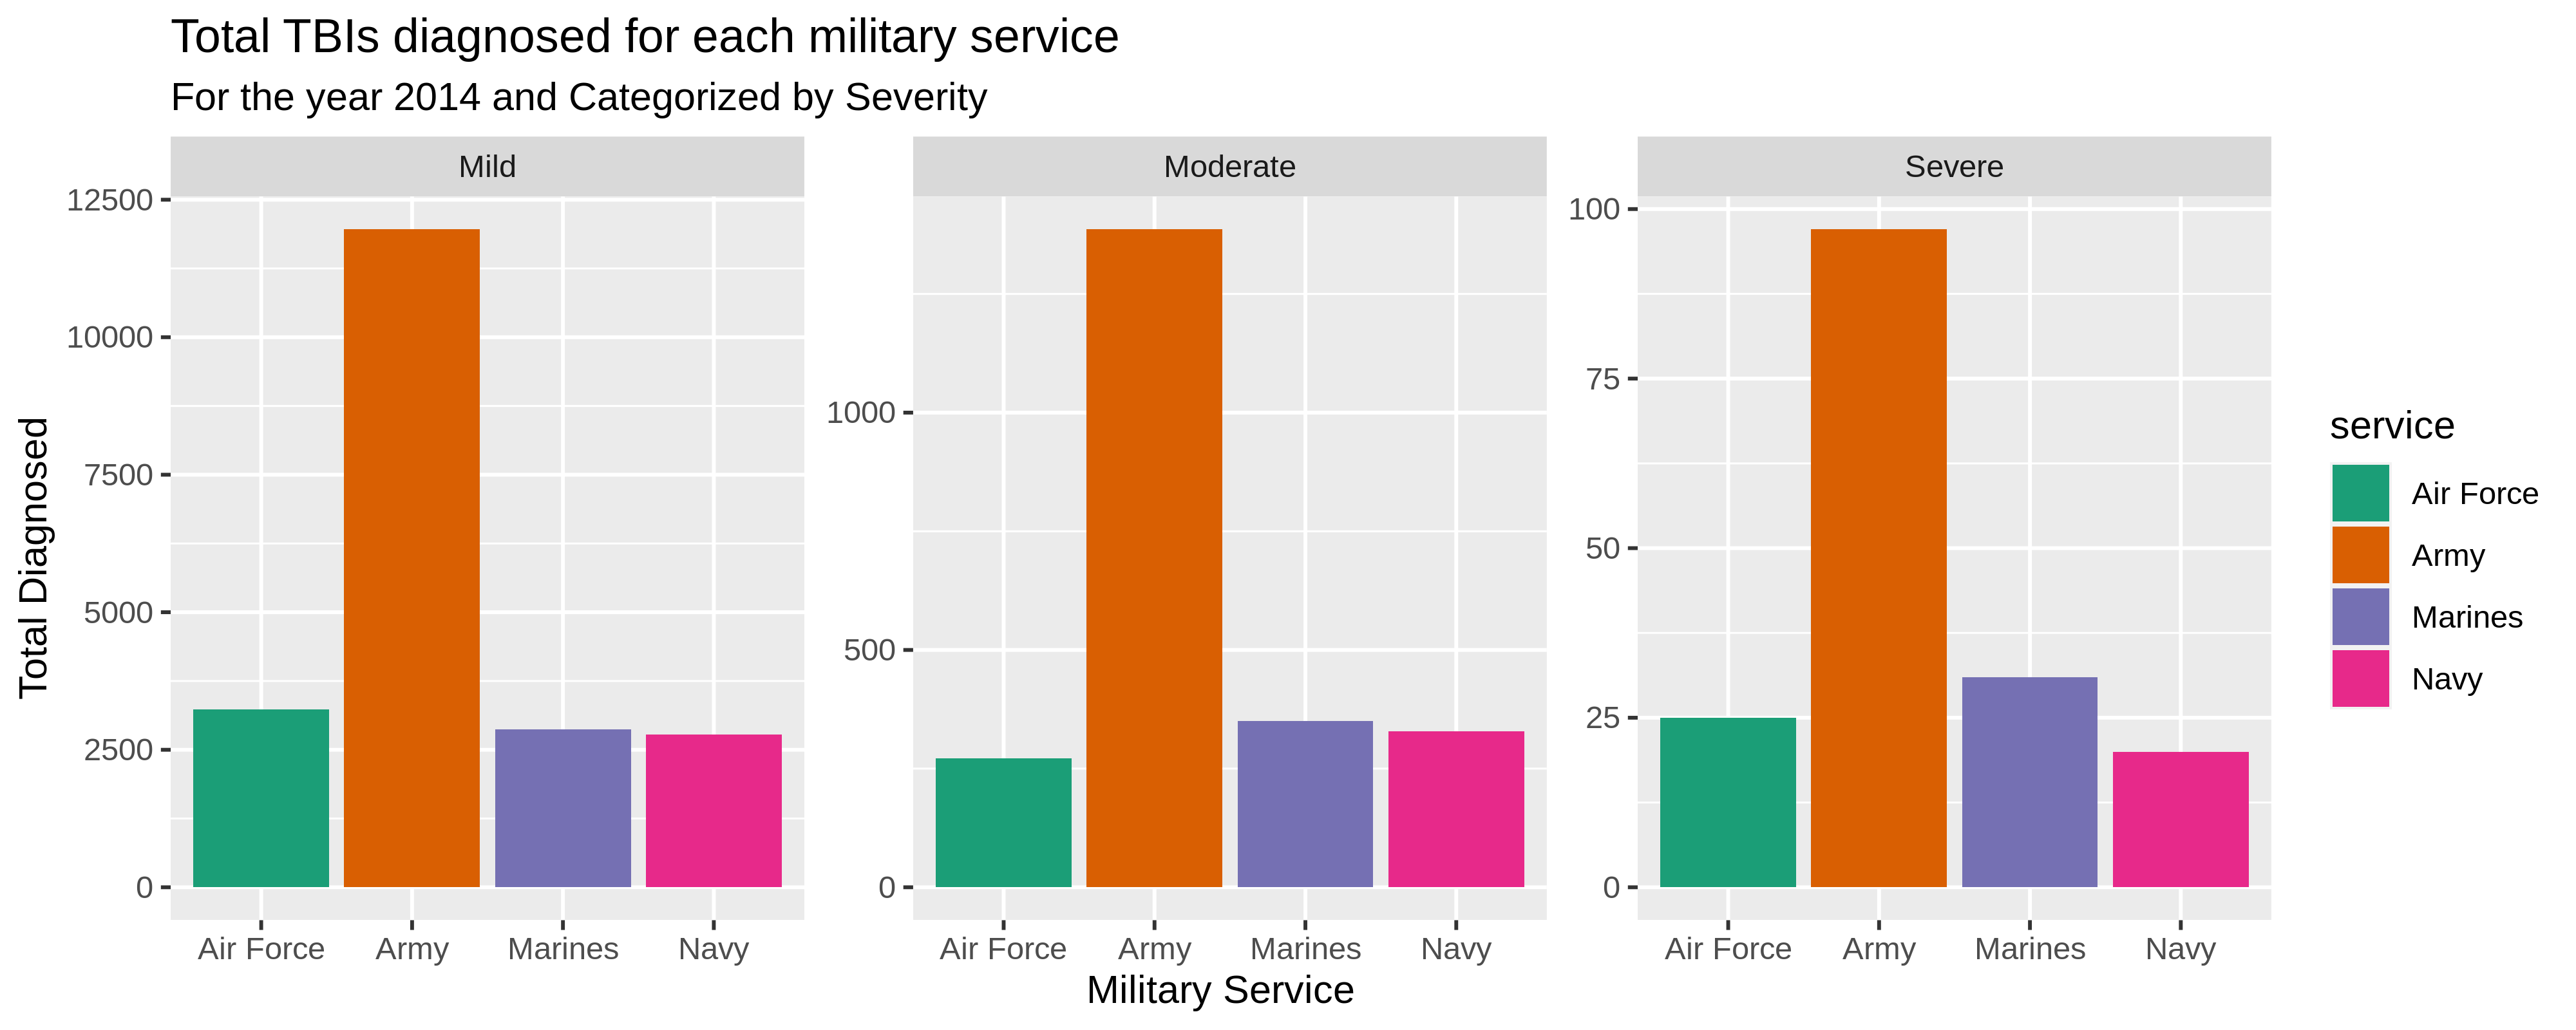

In [6]:
options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 400) 
p = ggplot(df.mili.group, aes(x = service, y = value, fill = service))
p = p + geom_col()
p = p + facet_wrap(~name, scales = 'free_y')
p = p + scale_fill_brewer(palette = "Dark2")
p = p + labs(title = 'Total TBIs diagnosed for each military service', 
             subtitle = 'For the year 2014 and Categorized by Severity',
                y = 'Total Diagnosed', x = 'Military Service')
p

## Creating the second graph: Distribution of Severe TBIs in the military over the years

To create this graph, I will first filter my data by Severe injuries. I am interested in observing the data for each year so I will group by year and service. Finally, I can total up the diagnosed injuries while eliminating any NA values. The head of the resulting data frame is shown below. 
For this chart, I employ the use of the geom_line() and geom_point() functions to illustrate the distribution of severe injuries for the years 2006 through 2014. In the subsequent plot, I facet_wrap by military service to display the injuries on an individual scale. It is clear through my analysis that the Army has consistently suffered the greatest rates of TBIs. 

In [7]:
df.severe = df.mili %>% filter(severity == "Severe") %>%
                group_by(year, service) %>%
                summarize(diagnosed = sum(diagnosed, na.rm=TRUE))
df.severe %>% head

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.



year,service,diagnosed
<dbl>,<chr>,<dbl>
2006,Air Force,30
2006,Army,139
2006,Marines,33
2006,Navy,29
2007,Air Force,26
2007,Army,170


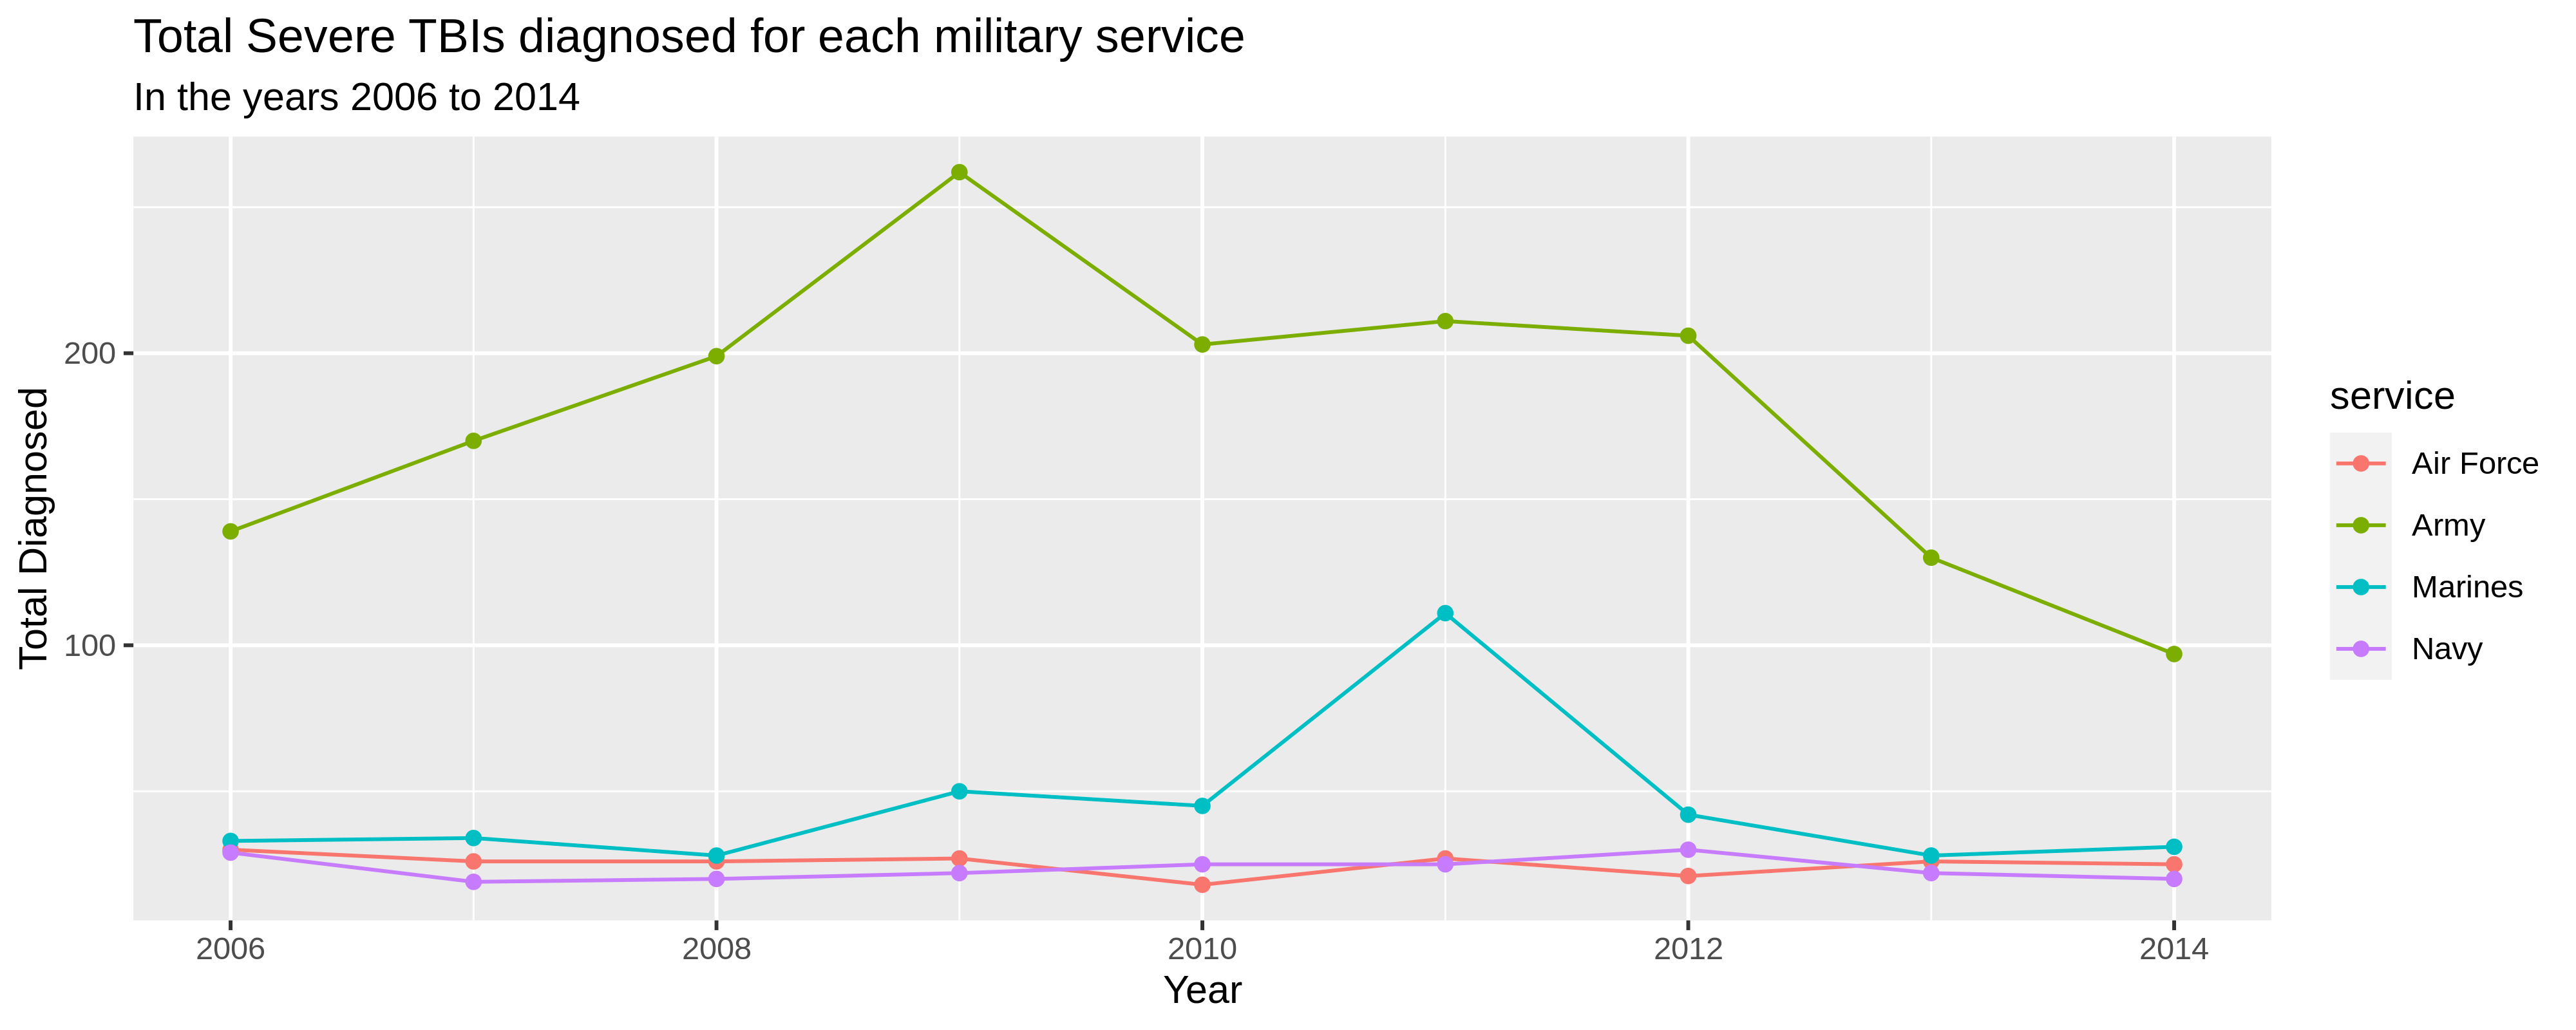

In [8]:
options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 400) 
p = ggplot(df.severe, aes(x = year, y = diagnosed, color = service))
p = p + geom_line()
p = p + geom_point()
p = p + labs(title = 'Total Severe TBIs diagnosed for each military service', 
             subtitle = 'In the years 2006 to 2014',
                y = 'Total Diagnosed', x = 'Year')
p

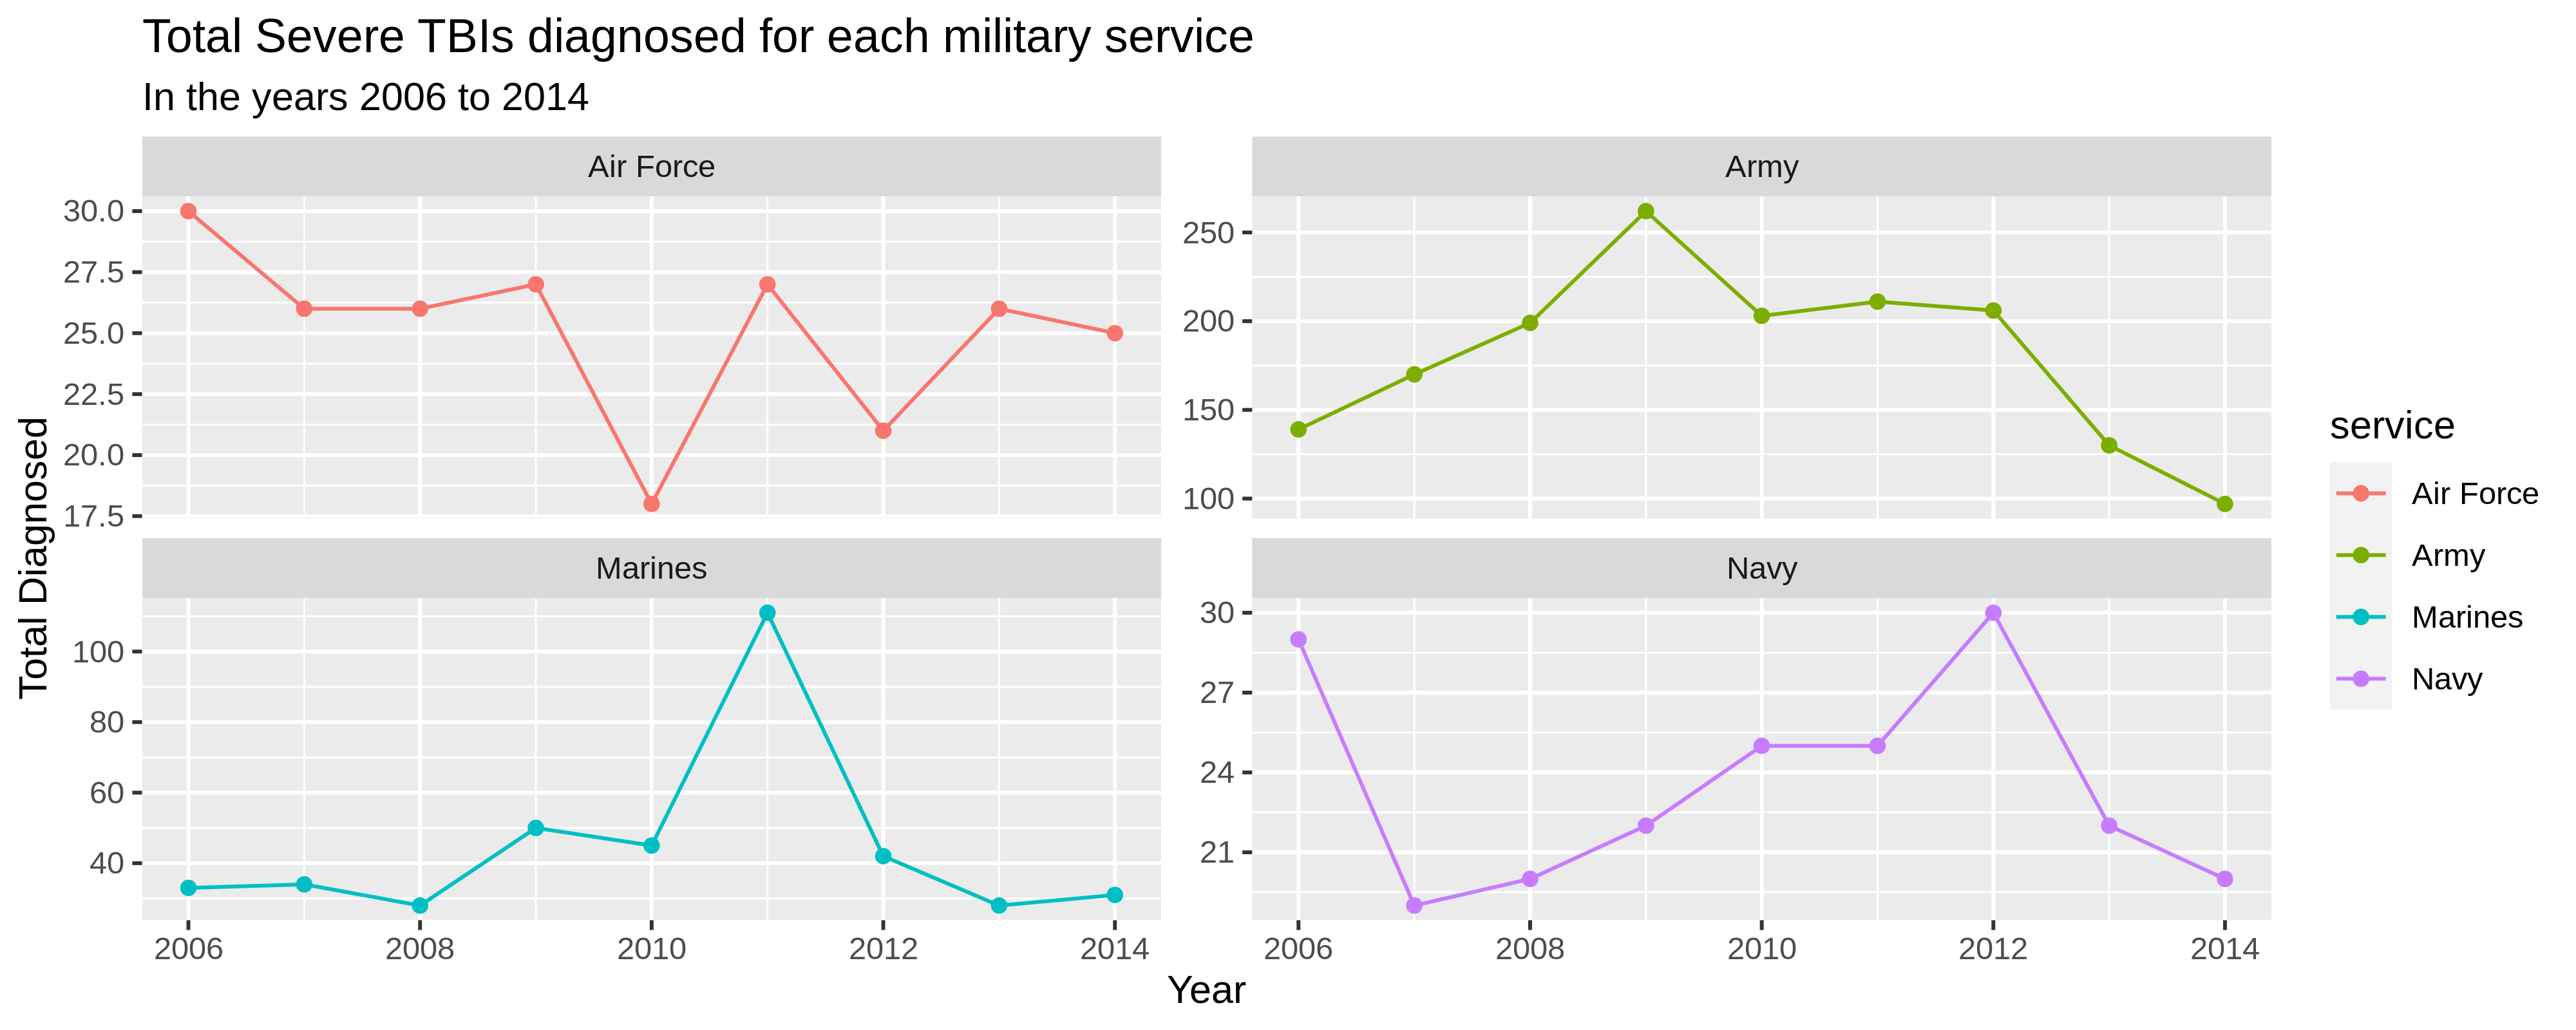

In [9]:
p = p + facet_wrap(~service, scales = 'free_y')
p